In [2]:
import joblib
results = joblib.load("demo_gymnasts.pkl")

# For the first frame show the keys

# Access the first frame by its key
first_frame = results['outputs//_DEMO/gymnasts/img/000001.jpg']



In [3]:
print(len(results))
print(first_frame.keys())

50
dict_keys(['time', 'shot', 'frame_path', 'tracked_ids', 'tracked_bbox', 'tid', 'bbox', 'tracked_time', 'appe', 'loca', 'pose', 'center', 'scale', 'size', 'img_path', 'img_name', 'class_name', 'conf', 'annotations', 'smpl', 'camera', 'camera_bbox', '3d_joints', '2d_joints', 'mask', 'extra_data'])


In [4]:
print(len(first_frame['2d_joints'][0]))

90


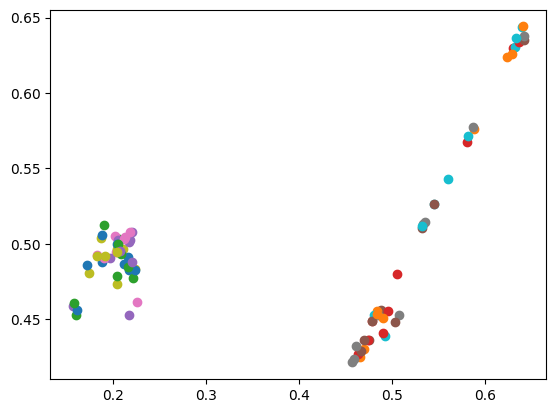

In [5]:
x,y,z=first_frame['2d_joints'][0][0],first_frame['2d_joints'][1][0],first_frame['2d_joints'][2][0]
#plot the coordinates
import matplotlib.pyplot as plt

for i in range(len(first_frame['2d_joints'][0])):
    x,y,z=first_frame['2d_joints'][0][i],first_frame['2d_joints'][1][i],first_frame['2d_joints'][2][i]
    plt.scatter(x,y)

plt.show()
    

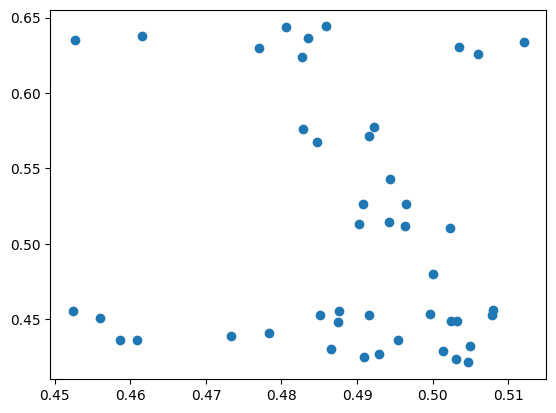

In [6]:
person1 = first_frame['2d_joints'][1]

if(1):
    #assuming pairs
    x_coords = person1[::2]
    y_coords = person1[1::2]
else:
    #Assuming The first 45 are the x coordinates and the last 45 are the y coordinates
    x_coords = person1[:45]
    y_coords = person1[45:]



plt.scatter(x_coords,y_coords)
plt.show()


In [9]:
#load .mp4 file
from moviepy.editor import VideoFileClip
import numpy as np
import os

# Define the path to your video file and the directory to save frames
##video_path = 'G:\\My Drive\\Dtu\\Master\\1 Semester\\Deep Learning\\Projects\\PKL-Test\\vid.mp4'
##save_dir = 'G:\\My Drive\\Dtu\\Master\\1 Semester\\Deep Learning\\Projects\\PKL-Test\\frames'



# Make sure the save directory exists, if not, create it.
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Load the video file using MoviePy
clip = VideoFileClip(video_path)

# Function to extract frames and save them with the frame number as the file name
def extract_frames(clip, target_dir):
    for i, frame in enumerate(clip.iter_frames(fps=clip.fps, dtype='uint8')):
        frame_path = os.path.join(target_dir, f"{i+1}.jpg")
        plt.imsave(frame_path, frame[:, :, :3])  # Save only RGB channels

# Extract and save the frames
extract_frames(clip, save_dir)




ModuleNotFoundError: No module named 'moviepy'

[0.3189297358194987]
258.0899 612.3451
1088 1920


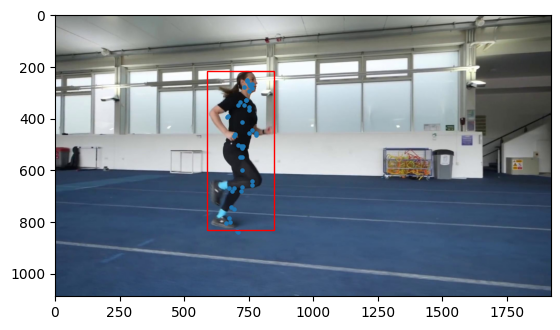

In [17]:
#load image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import joblib


#results = joblib.load("G:\\My Drive\\Dtu\Master\\1 Semester\\Deep Learning\\Projects\\PKL-Test\\demo_gymnasts.pkl")
#first_frame = results['outputs//_DEMO/gymnasts/img/000004.jpg']

results = joblib.load("demo_vid.pkl")
first_frame = results['outputs//_DEMO/vid/img/000001.jpg']

idx=0
person1_smpl=first_frame['smpl'][idx]

scale = first_frame['scale']
print(scale)

person1 = first_frame['2d_joints'][idx]
person3d = first_frame['3d_joints'][idx]
x,y,z=person3d[:,0],person3d[:,1],person3d[:,2]
person1_bbox = first_frame['bbox'][idx] #x,y,w,h

print(person1_bbox[2],person1_bbox[3])
x_coords = person1[::2]
y_coords = person1[1::2]


img = cv2.imread('frames/10.jpg')

factor_y = img.shape[1]
factor_x = img.shape[0]
print(factor_x,factor_y)
plt.imshow(img[:, :, ::-1]) 
# Scatter plot of joints
x_offset = 320
y_offset = 400
plt.scatter(x_coords * (factor_x)+x_offset, y_coords * (factor_y)-y_offset,s=5)

# Plot bounding box
x, y, w, h = person1_bbox
rect = plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.show()
